In [1]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.16.7
#   kernelspec:
#     display_name: Python (ML25_assignments)
#     language: python
#     name: ml25
# ---

# %% [markdown]
# # 4 Model Selection (optional)

# %%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
# %load_ext autoreload
# %autoreload 2

from a01_helper import *
from a01_functions import nb_train, nb_predict


In [2]:
# %%
# To create folds, you can use:
K = 5
Kf = KFold(n_splits=K, shuffle=True)
for i_train, i_test in Kf.split(X):
    # code here is executed K times, once per test fold
    # i_train has the row indexes of X to be used for training
    # i_test has the row indexes of X to be used for testing
    print(
        "Fold has {:d} training points and {:d} test points".format(
            len(i_train), len(i_test)
        )
    )

Fold has 48000 training points and 12000 test points
Fold has 48000 training points and 12000 test points
Fold has 48000 training points and 12000 test points
Fold has 48000 training points and 12000 test points
Fold has 48000 training points and 12000 test points


In [3]:
# %%
# Use cross-validation to find a good value of alpha. Also plot the obtained
# accuracy estimate (estimated from CV, i.e., without touching test data) as a
# function of alpha.
# YOUR CODE HERE

# Choose whether to run CV on the small sample (fast) or full MNIST (slow).
# For initial experimentation use use_sample=True. For final run set False.
use_sample = True

if use_sample:
    X_cv = X_s.copy()
    y_cv = y_s.copy()
    print("Using sampled data (fast).")
else:
    X_cv = X.copy()
    y_cv = y.copy()
    print("Using full data (slow).")

Using sampled data (fast).


In [4]:
# K-Fold setup (you already declared K above; reuse or set here)
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=0)

# Alphas to try: include small integers and a few larger values.
# You can change or extend this list.
alphas = [1, 2, 5, 10, 50, 100]

# Storage for results
mean_acc = []
std_acc = []
all_fold_acc = np.zeros((len(alphas), K))

# CV loop
for ia, alpha in enumerate(alphas):
    fold_idx = 0
    print(f"\nAlpha = {alpha}:")
    for train_idx, test_idx in kf.split(X_cv):
        Xtr, ytr = X_cv[train_idx], y_cv[train_idx]
        Xte, yte = X_cv[test_idx], y_cv[test_idx]

        # Train and predict
        model = nb_train(Xtr, ytr, alpha=alpha)
        pred = nb_predict(model, Xte)
        yhat = pred["yhat"]

        acc = accuracy_score(yte, yhat)
        all_fold_acc[ia, fold_idx] = acc
        print(f"  Fold {fold_idx+1}/{K} accuracy: {acc:.4f}")
        fold_idx += 1

    mean_acc.append(all_fold_acc[ia].mean())
    std_acc.append(all_fold_acc[ia].std())
    print(f"  -> mean acc: {mean_acc[-1]:.4f}, std: {std_acc[-1]:.4f}")

mean_acc = np.array(mean_acc)
std_acc = np.array(std_acc)


Alpha = 1:
  Fold 1/5 accuracy: 0.0750
  Fold 2/5 accuracy: 0.1350
  Fold 3/5 accuracy: 0.0800
  Fold 4/5 accuracy: 0.0800
  Fold 5/5 accuracy: 0.1300
  -> mean acc: 0.1000, std: 0.0266

Alpha = 2:
  Fold 1/5 accuracy: 0.2600
  Fold 2/5 accuracy: 0.5750
  Fold 3/5 accuracy: 0.4300


/Users/marmee/Desktop/Data Science/Semester 5/Machine Learning/Assignment/a01-nb/a01_functions.py:77: RuntimeWarning: divide by zero encountered in log
  return dict(logpriors=np.log(priors), logcls=np.log(cls))
/Users/marmee/Desktop/Data Science/Semester 5/Machine Learning/Assignment/a01-nb/a01_helper.py:136: RuntimeWarning: invalid value encountered in subtract
  return offset + np.log(np.sum(np.exp(x - offset), axis=0))
/Users/marmee/Desktop/Data Science/Semester 5/Machine Learning/Assignment/a01-nb/a01_functions.py:77: RuntimeWarning: divide by zero encountered in log
  return dict(logpriors=np.log(priors), logcls=np.log(cls))
/Users/marmee/Desktop/Data Science/Semester 5/Machine Learning/Assignment/a01-nb/a01_helper.py:136: RuntimeWarning: invalid value encountered in subtract
  return offset + np.log(np.sum(np.exp(x - offset), axis=0))
/Users/marmee/Desktop/Data Science/Semester 5/Machine Learning/Assignment/a01-nb/a01_functions.py:77: RuntimeWarning: divide by zero encountered i

  Fold 4/5 accuracy: 0.6100
  Fold 5/5 accuracy: 0.5400
  -> mean acc: 0.4830, std: 0.1268

Alpha = 5:
  Fold 1/5 accuracy: 0.1250
  Fold 2/5 accuracy: 0.4550
  Fold 3/5 accuracy: 0.3350
  Fold 4/5 accuracy: 0.5450
  Fold 5/5 accuracy: 0.3650
  -> mean acc: 0.3650, std: 0.1407

Alpha = 10:
  Fold 1/5 accuracy: 0.1000
  Fold 2/5 accuracy: 0.3550
  Fold 3/5 accuracy: 0.3000
  Fold 4/5 accuracy: 0.5100
  Fold 5/5 accuracy: 0.2700
  -> mean acc: 0.3070, std: 0.1325

Alpha = 50:
  Fold 1/5 accuracy: 0.0600
  Fold 2/5 accuracy: 0.2850
  Fold 3/5 accuracy: 0.1850
  Fold 4/5 accuracy: 0.4550
  Fold 5/5 accuracy: 0.1950
  -> mean acc: 0.2360, std: 0.1309

Alpha = 100:
  Fold 1/5 accuracy: 0.0550
  Fold 2/5 accuracy: 0.2700
  Fold 3/5 accuracy: 0.1350
  Fold 4/5 accuracy: 0.4600
  Fold 5/5 accuracy: 0.1800
  -> mean acc: 0.2200, std: 0.1387


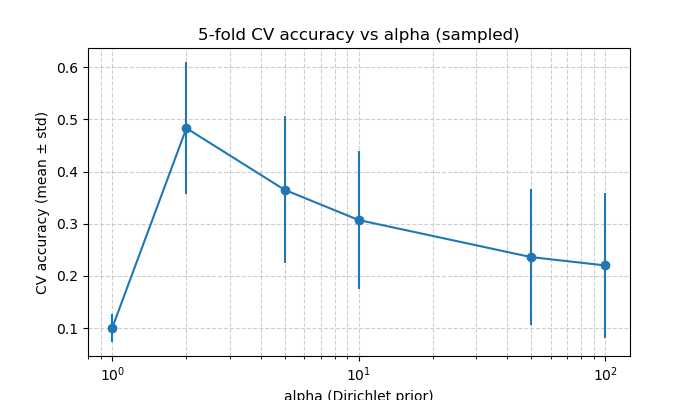

In [5]:
# Plot results
plt.figure(figsize=(7,4))
plt.errorbar(alphas, mean_acc, yerr=std_acc, marker='o', linestyle='-')
plt.xscale('log')  # alpha is a hyperparameter spanning multiple scales; log scale helps
plt.xlabel('alpha (Dirichlet prior)')
plt.ylabel('CV accuracy (mean ± std)')
plt.title(f'{K}-fold CV accuracy vs alpha {"(sampled)" if use_sample else "(full)"}')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

In [6]:
# Print best alpha (highest mean CV accuracy)
best_idx = np.argmax(mean_acc)
print(f"Best alpha (by mean CV acc): {alphas[best_idx]} with mean acc {mean_acc[best_idx]:.4f} ± {std_acc[best_idx]:.4f}")

Best alpha (by mean CV acc): 2 with mean acc 0.4830 ± 0.1268
